In [1]:
%load_ext autoreload
%autoreload 2

# SLIP
## a Simple Library for Image Processing


Table of content

* [What is the SLIP package?](#What-is-the-SLIP-package?) 
* [Installing](#Install) 
* [Reading an image](#Reading-an-image)
* [Importing the library](#Importing-the-library)
* [Filtering](#Filtering) 
* [Whitening](#Whitening) 
* [Handling a database](#Handling-a-database)
* [An application: statistics of natural images](#An-application:-statistics-of-natural-images)


## What is the SLIP package?

The ``SLIP`` library defines a simple object-oriented class for gray-scale image processing. Use it to create a SLIP object with a dedicated image size (and optionnaly some other useful parameters) - which you can use to apply common image processing routines to your images.

In [2]:
from SLIP import Image, imread
im = Image(pe='https://raw.githubusercontent.com/bicv/SLIP/master/default_param.py')
help(im)

Help on Image in module SLIP.SLIP object:

class Image(builtins.object)
 |  This library collects different Image Processing tools.
 |  
 |  Fork me on https://github.com/bicv/SLIP !
 |  
 |  This library is used in other projects, in particular  for use with the ``LogGabor`` and ``SparseEdges`` libraries
 |  For more information check respective pages @
 |      - http://pythonhosted.org/LogGabor and
 |      - http://pythonhosted.org/SparseEdges
 |  
 |  Collects image processing routines for one given image size:
 |   - Some classical related to pure Fourier number crunching:
 |      - creating masks
 |      - normalize,
 |      - fourier_grid : defines a useful grid for generating filters in FFT
 |      - show_FT : displays the envelope and impulse response of a filter
 |      - invert : go to the other of the fourier transform
 |  - Some usual application of Fourier filtering:
 |      - trans : translation filter in Fourier space
 |      - whitening procedures
 |   - Some related to

[Back to top](#SLIP)

## Installing

Requirements :

* numpy
* scipy
* NeuroTools
* ipython
* matplotlib

To install them, use

    pip install -U -r requirements.txt
    
Install using pip:

    pip install -U SLIP

In [3]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fig_width = 12
figsize=(fig_width, .618*fig_width)
fopts = {'fontsize':18}
opts= {'cmap': plt.cm.gray, 'vmin':-1., 'vmax':1., 'interpolation':'nearest', 'origin':'upper'}

[Back to top](#SLIP)

## Reading an image

In [4]:
from SLIP import imread
help(imread)

Help on function imread in module SLIP.SLIP:

imread(URL, grayscale=True, rgb2gray=[0.2989, 0.587, 0.114])
    Loads whatever image. Returns a grayscale (2D) image.
    
    Note that the convention for coordinates follows that of matrices: the origin is at the top left of the image, and coordinates are first the rows (vertical axis, going down) then the columns (horizontal axis, going right).
    
    These scalar values correspond to the grayscale luminance: "The intensity of a pixel is expressed within a given range between a minimum and a maximum, inclusive. This range is represented in an abstract way as a range from 0 (total absence, black) and 1 (total presence, white), with any fractional values in between." This range is here between 0 and 1.
    
    If ``grayscale`` is True, a grayscale image is obtained by summing over channels following the formula:
    
    Y  = 0.2989 * R + 0.5870 * G + 0.1140 * B
    
    http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_tran

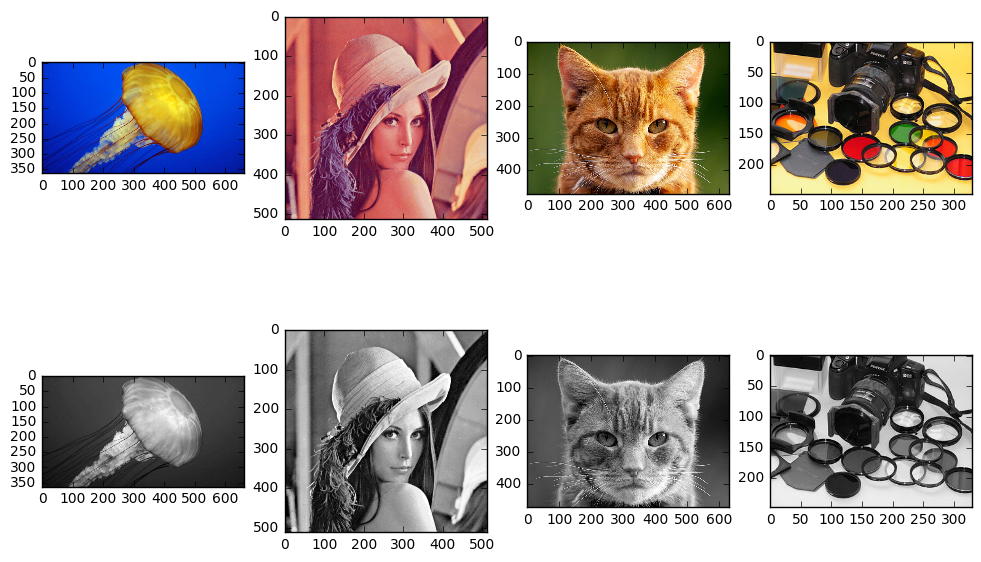

In [5]:
from imageio import imread as ioimread
fig, ax = plt.subplots(2, 4, figsize=figsize)
for i, URL in enumerate(['http://static.prsa.pl/images/fad62735-b1c7-4ff4-811e-928b42fa1c89.jpg', 
                            'http://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_color.gif', 
                            'https://www.petfinder.com/wp-content/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg',
                            'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Filterstef.JPG/330px-Filterstef.JPG']):
    ax[0][i].imshow(ioimread(URL))
    ax[1][i].imshow(imread(URL), cmap=plt.gray())    


[Back to top](#SLIP)

## Importing the library

In [6]:
im = Image((128, 128))
help(im.__init__)

Help on method __init__ in module SLIP.SLIP:

__init__(pe='https://raw.githubusercontent.com/bicv/SLIP/master/default_param.py') method of SLIP.SLIP.Image instance
    Initializes the Image class
    
    May take as input:
    
    - a dictionary containing parameters
    - a ``ndarray`` (dimensions ``N_X`` and ``N_Y`` are guessed from this array)
    - a string representing a file or URL pointing to an image file
    - a string pointing to  a file or URL containing a dictionary of parameters (or simply the name of the file)
    - a ``NeuroTools.parameters.ParameterSet`` object containing parameters
    
    Parameters are
    
    - N_X and N_Y which are respectively the number of pixels in the vertical and horizontal dimensions respectively (MANDATORY)
    - optional parameters which are used in the various functions such as N_image when handling a database or the whitening parameters.



[Back to top](#SLIP)

## Filtering

In [7]:
help(im.FTfilter)

Help on method FTfilter in module SLIP.SLIP:

FTfilter(image, FT_filter, full=False) method of SLIP.SLIP.Image instance
    Using the ``FTfilter`` function, it is easy to filter an image with a filter defined in Fourier space.



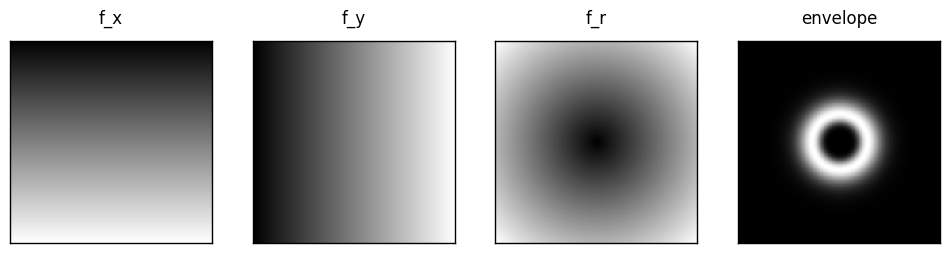

In [8]:
from SLIP import Image
sf_0 = 0.15
B_sf = 0.05
theta_0 = np.pi/2
B_theta = 0.15
loggabor = True

def envelope_radial(im, sf_0=sf_0, B_sf=B_sf, loggabor=loggabor, norm=True):
    if sf_0 == 0.: return 1.
    if loggabor:
        env = 1./im.f*np.exp(-.5*(np.log(im.f/sf_0)**2)/(np.log((sf_0+B_sf)/sf_0)**2))
        if norm: env /= np.sqrt((env**2).sum())
        return env
    else:
        return np.exp(-.5*(im.f - sf_0)**2/B_sf**2)

im = Image('default_param.py')
env = envelope_radial(im)

fig, ax = plt.subplots(1, 4, figsize=figsize)
for i, (f, label) in enumerate(zip([im.f_x, im.f_y, im.f, env], ['f_x', 'f_y', 'f_r', 'envelope'])):
    ax[i].matshow(f)
    ax[i].set_title(label)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    

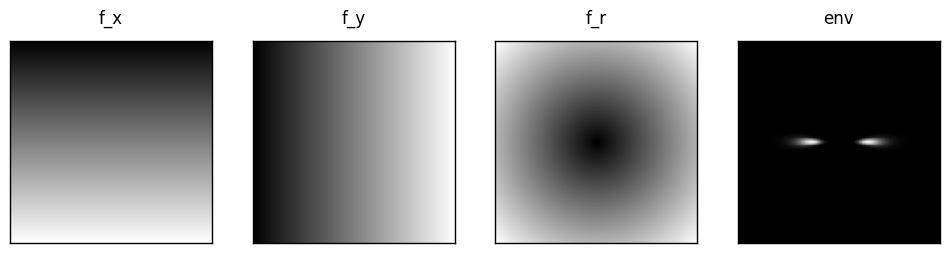

In [9]:
def envelope_orientation(im, theta_0=theta_0, B_theta=B_theta, norm=True):
    env =  np.exp(np.cos(2*(im.f_theta-theta_0))/B_theta**2)
    if norm: env /= np.sqrt((env**2).sum())
    return env


env = envelope_radial(im) * envelope_orientation(im)

fig, ax = plt.subplots(1, 4, figsize=figsize)
for i, (f, label) in enumerate(zip([im.f_x, im.f_y, im.f, env], ['f_x', 'f_y', 'f_r', 'env'])):
    ax[i].matshow(f)
    ax[i].set_title(label)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    

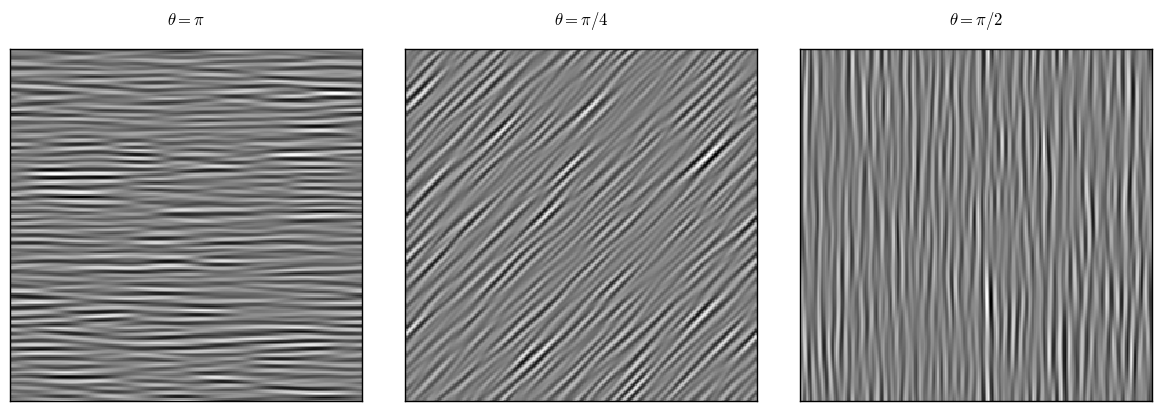

In [10]:
# one can then easily generate a texture
theta0 = np.pi/2
Btheta = 0.15
theta_0 = [0, np.pi/4, np.pi/2]
B_theta = [0.1, 0.5, 1.]

def texture(env):
    return np.fft.fft2(np.fft.ifftshift(env * np.exp(1j * 2 * np.pi * np.random.rand(env.shape[0], env.shape[1])))).real

def impulse(env, phi=2 * np.pi):
    I = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(env * np.exp(1j * phi))).real)
    I /= env.sum()
    return I

fig, ax = plt.subplots(1, 3, figsize=(fig_width, fig_width*6/18))
for i, (theta0_, label) in enumerate(zip(theta_0, [r'$\theta = \pi$', r'$\theta = \pi/4$', r'$\theta = \pi/2$']) ) :
    env = envelope_radial(im) * envelope_orientation(im, theta_0=theta0_, B_theta=Btheta)
    I = texture(env)
    ax[i].matshow(I, cmap=plt.cm.gray)
    ax[i].set_title(label)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()

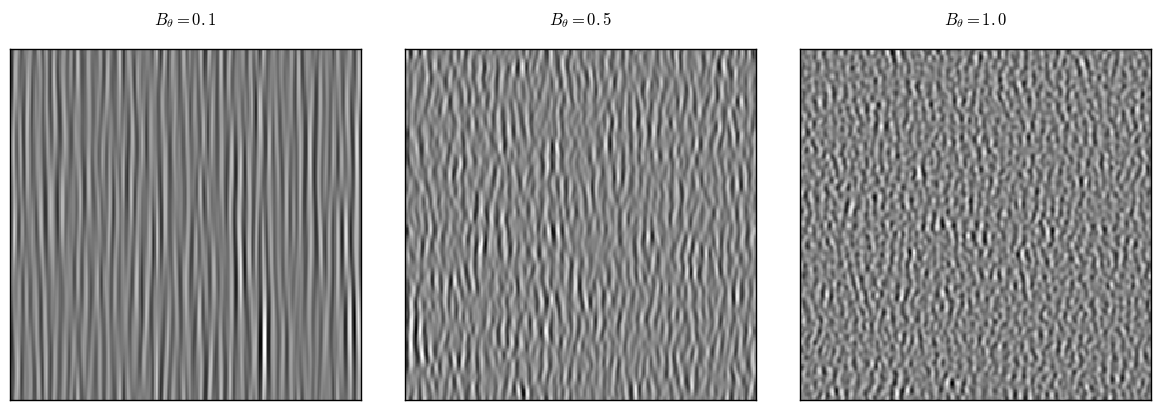

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, fig_width*6/18))
for i, (Btheta_, label) in enumerate(zip(B_theta, [r'$B_\theta = 0.1$', r'$B_\theta = 0.5$', r'$B_\theta = 1.0$']) ) :
    env = envelope_radial(im) * envelope_orientation(im, theta_0=theta0, B_theta=Btheta_)
    I = texture(env)
    ax[i].matshow(I, cmap=plt.cm.gray)
    ax[i].set_title(label)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()

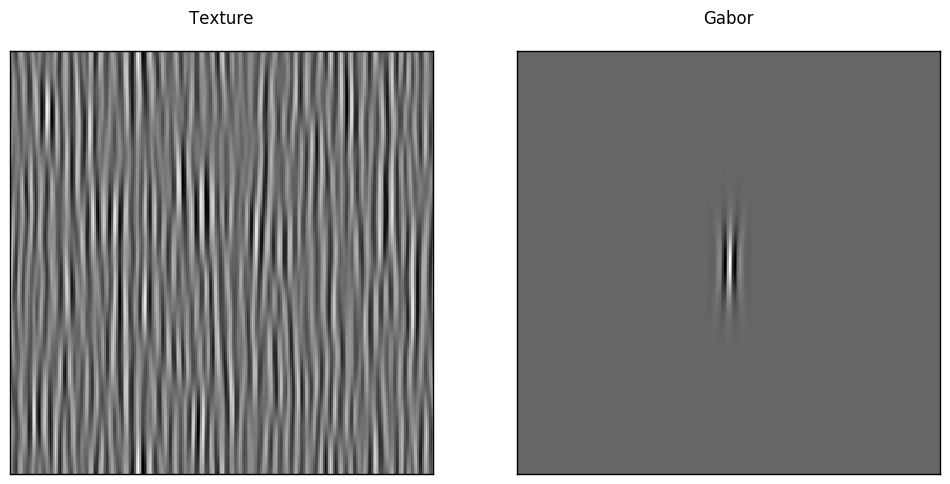

In [12]:
env_in = envelope_radial(im) * envelope_orientation(im)
env_V1 = envelope_radial(im) * envelope_orientation(im, theta_0=np.random.rand()*np.pi)

fig, ax = plt.subplots(1, 2, figsize=figsize)
for i, (f, label) in enumerate(zip([texture(env_in), impulse(env_V1)], [u'Texture', u'Gabor'])):
    ax[i].matshow(f, cmap=plt.cm.gray)
    ax[i].set_title(label)
    ax[i].set_xticks([])
    ax[i].set_yticks([])    

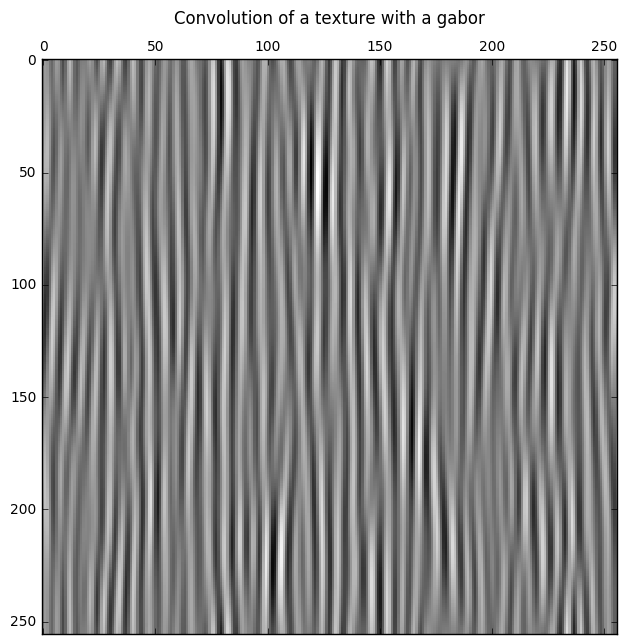

In [13]:
def convolve(image_in, image_V1):
    env_in = np.fft.fft2(image_in)
    env_V1 = np.fft.fft2(image_V1)
    return np.fft.fftshift(np.fft.ifft2((env_in*env_V1)).real)

R = convolve(texture(env_in), impulse(env_V1))
fig, ax = plt.subplots(figsize=figsize)
ax.matshow(R, cmap=plt.cm.gray)
_= plt.title(u"Convolution of a texture with a gabor")

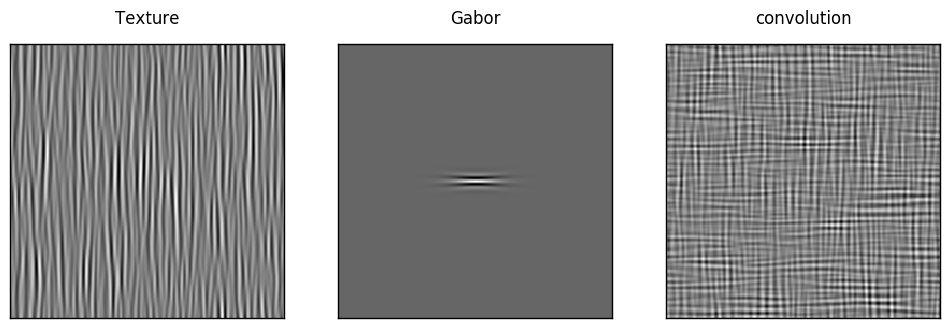

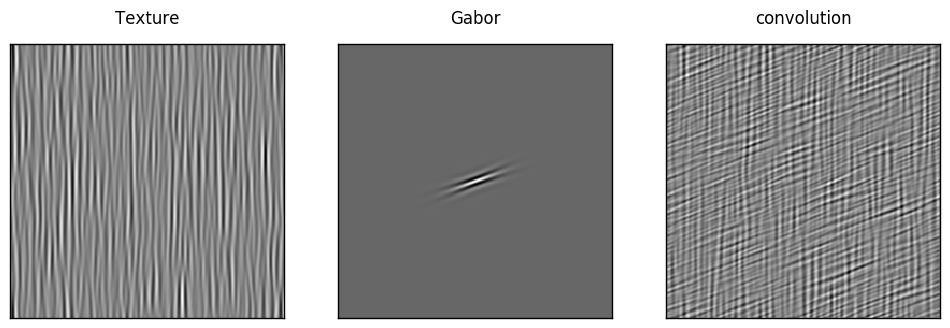

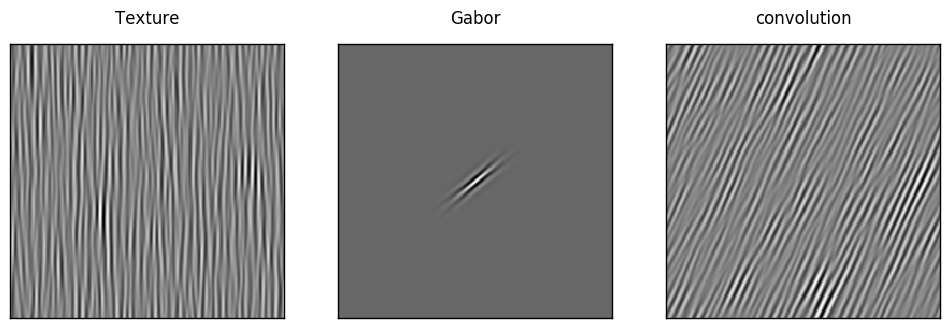

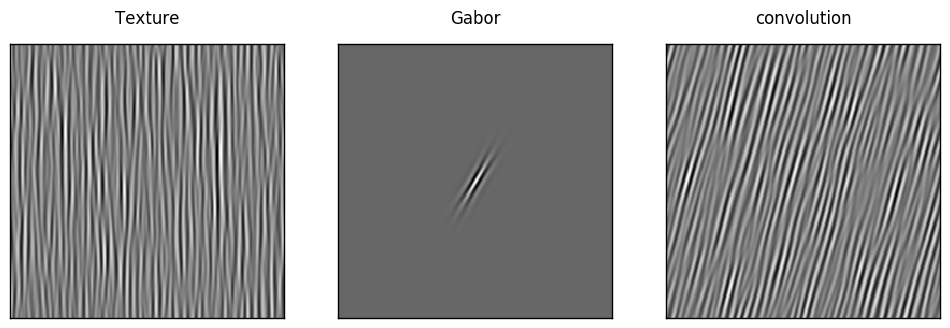

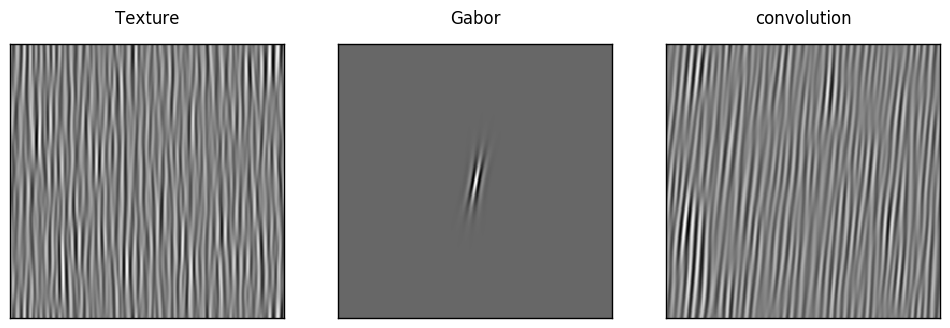

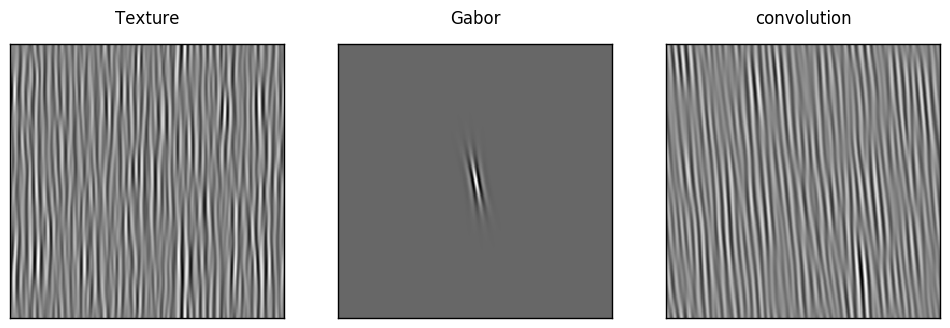

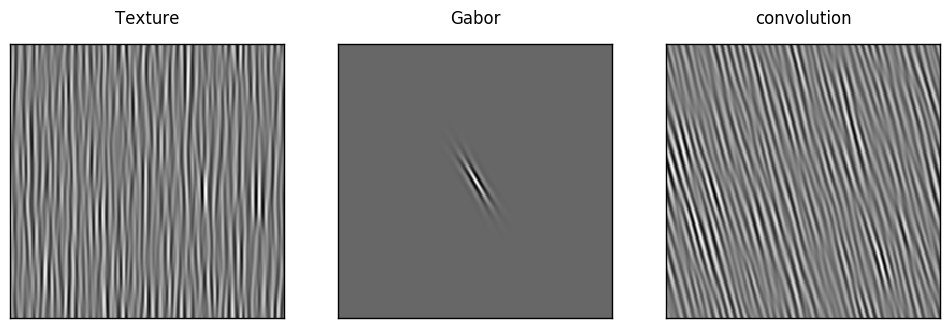

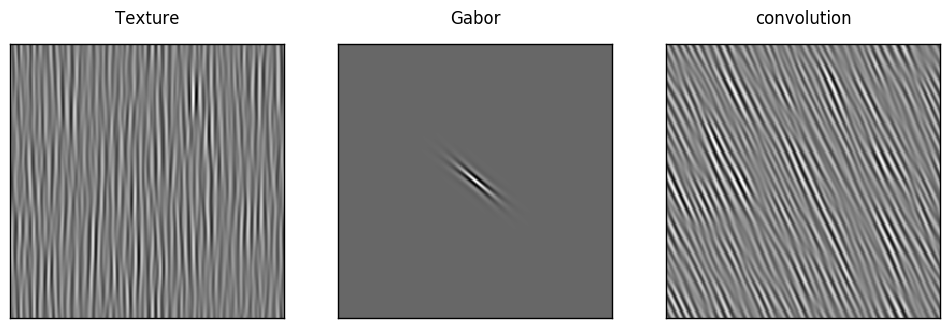

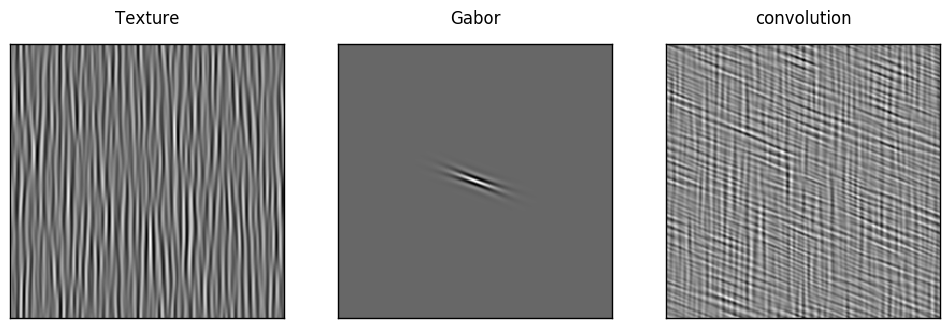

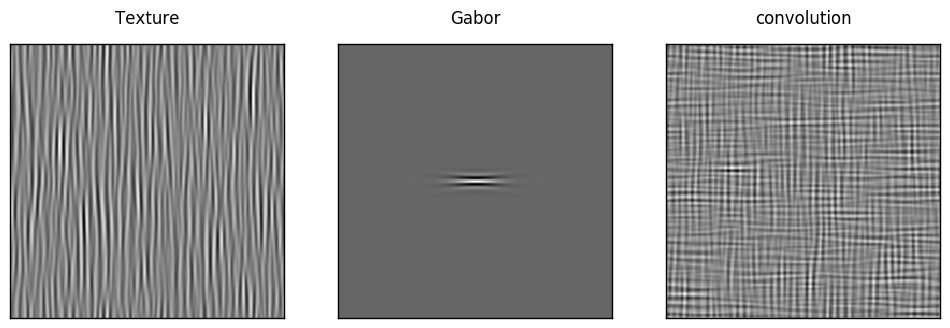

In [14]:
# images of convolutions with differents angles
N_theta=360
theta0 = np.pi/2
theta_0 = np.linspace(0., np.pi, 10)

for i, theta0_ in enumerate(theta_0) :
    env_in = envelope_radial(im) * envelope_orientation(im)
    env_V1 = envelope_radial(im) * envelope_orientation(im, theta_0=theta0_)
    R = convolve(texture(env_in), impulse(env_V1))
    fig, ax = plt.subplots(1, 3, figsize=figsize)
    for i, (f, label) in enumerate(zip([texture(env_in), impulse(env_V1), R], [u'Texture', u'Gabor', u'convolution'])):
        ax[i].matshow(f, cmap=plt.cm.gray)
        ax[i].set_title(label)
        ax[i].set_xticks([])
        ax[i].set_yticks([])

[Back to top](#SLIP)

## Whitening

In [15]:
help(im.whitening_filt)

Help on method whitening_filt in module SLIP.SLIP:

whitening_filt(recompute=False) method of SLIP.SLIP.Image instance
    Returns the envelope of the whitening filter.
    
    if we chose one based on structural assumptions (``struct=True``)
        then we return a 1/f spectrum based on the assumption that the structure of images
        is self-similar and thus that the Fourier spectrum scales a priori in 1/f.
    
    elif we chose to learn,
        returns theaverage correlation filter in FT space.
    
        Computes the average power spectrum = FT of cross-correlation, the mean decorrelation
        is given for instance by (Attick, 92).
    
    else
        we return the parametrization based on Olshausen, 1996



Testing the whitening strategy.

Generates 2 figures:

* one which compares Olshausen's formulation and the actual statistical measure
* one which shows the actual effect of whitening


In [16]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fig_width = 16
figsize=(fig_width, .618*fig_width)
fopts = {'fontsize':18}

 Learning the whitening filter


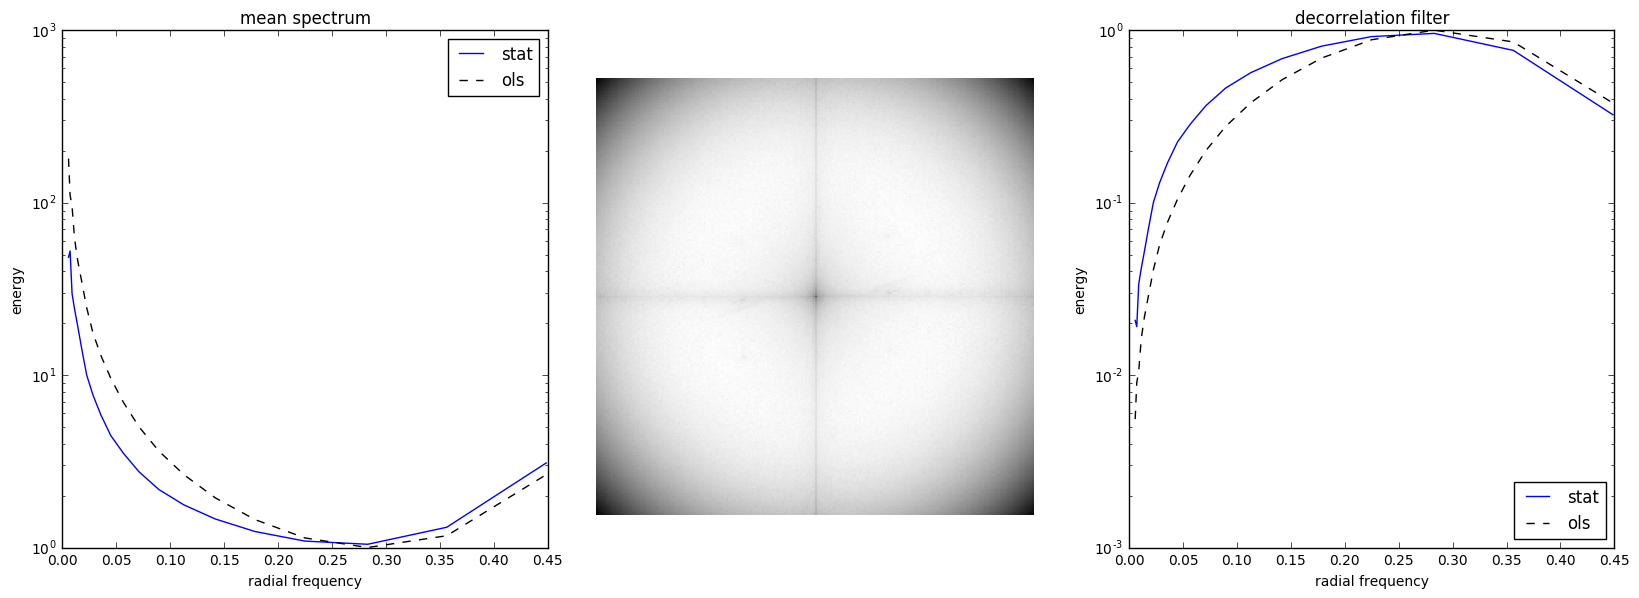

In [ ]:
from SLIP import Image
im = Image('default_param.py')

im.pe.white_n_learning = 100
K = im.whitening_filt(recompute=True)
f_bins, theta_bins, K_rot = im.hist_radial_frequency(K)
im.pe.white_n_learning = 0
K_ols = im.whitening_filt()
f_bins, theta_bins, K_ols_rot = im.hist_radial_frequency(K_ols)

fig = plt.figure(figsize=(fig_width, fig_width/3))
bord = 0.03
a = plt.axes([bord, bord, 1/3.-bord,  1-bord])
f_bins_m = .5*(f_bins[:-1]+f_bins[1:])
a.semilogy(f_bins_m, 1/K_rot.mean(axis=1),c='b', label='stat')
a.semilogy(f_bins_m, 1/K_ols_rot.mean(axis=1), c='k', ls='--', label='ols')
a.set_xlabel('radial frequency')
a.set_ylabel('energy')
a.set_title('mean spectrum')
a.legend(loc="upper right")

a = plt.axes([1/3.+bord, bord, 1/3.-2*bord , 1. -2*bord])
a.matshow(np.log(K))
a.axis('off')

a = plt.axes([2/3.+bord, bord, 1/3.-bord, 1-bord])
a.semilogy(f_bins_m, K_rot.mean(axis=1),c='b', label='stat')
a.semilogy(f_bins_m, K_ols_rot.mean(axis=1), c='k', ls='--', label='ols')
a.set_xlabel('radial frequency')
a.set_ylabel('energy')
a.set_title('decorrelation filter')
_ = a.legend(loc="lower right")


In [ ]:
from SLIP import Image
im = Image('default_param.py')

im.pe.white_n_learning = 100
for size in [64, 128, 256]:
    im = Image('default_param.py')
    im.pe.white_n_learning = 100
    image = im.imread('https://github.com/bicv/LogGabor/raw/master/database/lena' +np.str(size) + '.png')
    print(' Testing that whitening effectively works... ')
    xcorr, xcorr_white = np.zeros((im.pe.N_X, im.pe.N_Y)), np.zeros((im.pe.N_X, im.pe.N_Y))
    for i_learning in range(im.pe.white_n_learning):
        image_patch, filename, croparea = im.patch(im.pe.white_name_database, verbose=False)
        xcorr += im.power_spectrum(image_patch)/im.pe.white_n_learning
        image_patch = im.whitening(image_patch)
        xcorr_white += im.power_spectrum(image_patch)/im.pe.white_n_learning

    middle = np.ceil(K.shape[0]/2)
    print('Figure whitening')
    fig = plt.figure(figsize=(fig_width, .618*fig_width))
    bord = .03
    # top left
    a = plt.axes([0,  1/2., 1/3., 1/2.])
    a.matshow(image, cmap=plt.gray())
    a.set_ylabel('image')
    a.axis('off')
    # top right
    a = plt.axes([2/3., 1/2., 1/3., 1/2.])
    white = im.whitening(image)
    a.matshow(white, cmap=plt.gray())
    a.set_ylabel('whitened image')
    a.axis('off')
    # middle
    a = plt.axes([1/3.+bord, .25, 1/3.-2*bord , 1/2.])
    impulse = np.zeros(image.shape)#(25,25))
    impulse[24,24] = 1
    K = im.whitening(impulse)[:49,:49]
    middle = np.ceil(K.shape[0]/2)
    K_middle = .5 * (K[middle,:] + K[middle+1,:])
    a.plot([24,24],[np.min(K_middle), np.max(K_middle)], c='k')
    a.plot([0, 49],[0,0], c='k')
    a.plot(K_middle, c='b')
    a.set_title('decorrelation filter')
    a.axis('off')
    # bottom left
    a = plt.axes([0,  0, 1/3., 1/2.])
    a.matshow(xcorr, cmap=plt.jet())#
    a.axis('off')
    #bottom right
    a = plt.axes([2/3., 0, 1/3., 1/2.])
    a.matshow(xcorr_white, cmap=plt.jet())
    a.axis('off')


 Testing that whitening effectively works... 
Figure whitening
 Testing that whitening effectively works... 


In [ ]:
import holoviews as hv
%load_ext holoviews.ipython
%output size=150 dpi=120
%opts Image (cmap='gray')
image = imread('https://github.com/bicv/LogGabor/raw/master/database/yelmo256.png')
image = im.preprocess(image)
hv.Image(im.normalize(image), value_dimensions=[hv.Dimension('Image', range=(-1,1))]).hist()

In [ ]:
#! whitening to balance the energy of evey frequency band
white = im.whitening(image)
hv.Image(im.normalize(white)).hist()

In [ ]:
#! the filtering operation preserves infomation (none is lost...)
hv.Image(white - im.FTfilter(white, 1.)).hist()

In [ ]:
""" This is just to remember that we use a simpler fitering technique.

In the Attick LGN, the gain is changed according to an estimation of the SNR.

"""
print('Figure Atick')
image = plt.imread('https://github.com/bicv/LogGabor/raw/master/database/lena256.png')[:,:,0]

contrasts = 1. / 2**np.arange(6)
freqs = np.linspace(0.,.49, 40)
size  = image.shape
x, y = np.mgrid[0:size[0],0:size[1]]

response = np.zeros((len(freqs), len(contrasts)))
for i_contrast, contrast in enumerate(contrasts):
    for i_freq, freq in enumerate(freqs):
        image = contrast * np.sin( 2* np.pi * x * freq)
        white = im.whitening(image)
        response[i_freq,i_contrast] = np.std(white)
response.shape

fig = plt.figure(figsize=(fig_width, 0.618*fig_width))
a = plt.subplot(111)
a.loglog(freqs,response,c='b')
plt.xlabel('frequency (cycles / pixel)')
_ = plt.axis('tight')

[Back to top](#SLIP)

## defining input image as Lena

In [ ]:
image = plt.imread('https://github.com/bicv/LogGabor/raw/master/database/lena256.png').mean(axis=-1)
print(image.mean(), image.std())
im = Image('default_param.py')
im.pe.N_X, im.pe.N_Y = image.shape
im.init()
image = im.normalize(image, center=False)
print(image.mean(), image.std())
image = im.normalize(image, center=True)
print(image.mean(), image.std())

In [ ]:
fig = plt.figure(figsize=figsize)
a1 = fig.add_subplot(121)
a2 = fig.add_subplot(122)
a1.imshow(im.normalize(image, center=True, use_max=True), **opts)
a1.set_xlabel('Y'), a1.set_ylabel('X')
a1.plot([100.], [50.], 'r*')
a1.text(100., 50., 'X=50., Y=100.')
a1.axis([0, image.shape[0], image.shape[1], 0])
a2.imshow(im.normalize(im.whitening(image), center=True, use_max=True), **opts)
a2.plot([10.], [150.], 'r*')
a2.text(10., 150., 'X=150., Y=10.')
a2.set_xlabel('Y')
v = a2.axis([0, image.shape[0], image.shape[1], 0])

In [ ]:
fig = plt.figure(figsize=figsize)
a1 = fig.add_subplot(121)
a2 = fig.add_subplot(122)
a1.imshow(im.normalize(image, center=True, use_max=True), **opts)
a1.set_xlabel('Y'), a1.set_ylabel('X')
a1.axis([0, image.shape[0], image.shape[1], 0])
a2.imshow(im.normalize(im.dewhitening(im.whitening(image)), center=True, use_max=True), **opts)
a2.set_xlabel('Y')
v = a2.axis([0, image.shape[0], image.shape[1], 0])

[Back to top](#SLIP)

## An application: statistics of natural images

In [ ]:
import holoviews as hv
%load_ext holoviews.ipython
%output size=150 dpi=120

In [ ]:
%opts Image (cmap='hot')
key_dims = [hv.Dimension('$f_x$', range=(0,1)), hv.Dimension('$f_y$', range=(0,1))]
s_f = hv.Image(im.f, group='radial frequency coordinates', key_dimensions=key_dims).hist()
s_theta = hv.Image(im.f_theta, group='radial frequency coordinates', key_dimensions=key_dims).hist()
s_f + s_theta

In [ ]:
im = Image('default_param.py')
im.pe.datapath = 'database/'
name_database = 'serre07_targets'
imagelist = im.make_imagelist(name_database=name_database)

In [ ]:
F = np.zeros_like(im.f_x)
for filename, croparea in imagelist:
    image, filename_, croparea_ = im.patch(name_database, filename=filename, croparea=croparea, center=False)
    F += np.fft.fftshift(np.absolute(np.fft.fftn(image))**2)
F /= F.max()

In [ ]:
#fig, axs = plt.subplots(1, 1, figsize=(13, 13))
#axs.contourf(im.f_x[0, :], im.f_y[0, :], np.log(F).T, cmap=plt.hot())
#axs.pcolor(im.f_x, im.f_y, np.log(F), cmap=plt.hot())
#axs.axis('tight')
#axs.set_xlabel('radial frequency')
#_ = axs.set_ylabel('temporal frequency')
%opts Image (cmap='hot')
key_dims = [hv.Dimension('$f_x$', range=(0,1)), hv.Dimension('$f_y$', range=(0,1))]
hv.Image(np.log(F), group='average spectral energy', key_dimensions=key_dims).hist()

In [ ]:
print('F is maximum at :', np.unravel_index(np.argmax(F), dims=F.shape), ' (we expected (', F.shape[0]/2, ', ', F.shape[0]/2, ') )')

We now try to fit a power-law to one slice:

In [ ]:
!pip3 install lmfit

In [ ]:
from lmfit.models import PowerLawModel
mod = PowerLawModel()
valid = -(np.arange(F.shape[0])==F.shape[0]/2)
pars = mod.guess(F[valid, F.shape[0]/2], x=np.abs(im.f_x[valid, F.shape[0]/2]))
out  = mod.fit(F[valid, F.shape[0]/2], pars, x=np.abs(im.f_x[valid, F.shape[0]/2]))
print(out.fit_report(min_correl=0.25))

valid = -(np.arange(F.shape[1])==F.shape[1]/2)
pars = mod.guess(F[F.shape[1]/2, valid], x=np.abs(im.f_y[F.shape[1]/2, valid]))
out  = mod.fit(F[F.shape[1]/2, valid], pars, x=np.abs(im.f_y[F.shape[1]/2, valid]))
print(out.fit_report(min_correl=0.25))


This proves that the spectrum of natural images falls as $\frac{1}{f^2}$. But is that true for all directions? Let's slice the Fourier spectrum along different orientations:

In [ ]:
N_f = 12 #F.shape[0]/2 # making an histogram with N_f bins
f_bins = np.linspace(0., 0.5, N_f+1)
f_bins = np.logspace(-.5, 0, N_f+1, base=10)*0.5

N_orientations = 12 # making an histogram with N_f bins
theta_bins = np.linspace(0, np.pi, N_orientations, endpoint=False)

F_rot = np.zeros((N_f, N_orientations))
for i_theta in range(N_orientations):
    for i_f in range(N_f):
        f_slice = (f_bins[i_f] < im.f) *  ( im.f < f_bins[i_f+1])
        theta_slice = np.exp(np.cos(im.f_theta - theta_bins[i_theta])/(1.5*2*np.pi/N_orientations)**2)
        F_rot[i_f, i_theta] = (f_slice * theta_slice * F).sum()
        F_rot[i_f, i_theta] /= (f_slice * theta_slice).sum() # normalize by the integration area (numeric)
if np.isnan(F_rot).any(): print('Beware of the NaNs!')
F_rot /= F_rot.max()
hv.Image(np.log10(F_rot), group='average spectral energy', key_dimensions=key_dims).hist()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=figsize) # fib
axs.set_color_cycle(np.array([[0., 1., 1.]]) * np.abs(f_bins)[:, np.newaxis])
fit_exp = np.zeros(N_orientations)
for i_theta in range(N_orientations): 
    axs.loglog((f_bins[:-1]+f_bins[1:])/2, F_rot[:, i_theta], 'o', alpha=.3)
    pars = mod.guess(F_rot[:, i_theta], x=(f_bins[:-1]+f_bins[1:])/2)
    out  = mod.fit(F_rot[:, i_theta], pars, x=(f_bins[:-1]+f_bins[1:])/2)
    fit_exp[i_theta] = -out.params.get('exponent').value
axs.axis('tight')
axs.set_xlabel('spatial frequency', **fopts)
_ = axs.set_ylabel('Power', **fopts)
inset = fig.add_axes([0.6, 0.58, .3, .3], axisbg='w')
inset.bar(theta_bins, fit_exp, width=theta_bins[1]-theta_bins[0])
inset.set_xlim((0, np.pi))
inset.set_xlabel('orientation', **fopts)
inset.set_ylabel('exponent of the best-fit \n of a power-law', fontsize=10)
fit = ((f_bins[:-1]+f_bins[1:])/2)**-fit_exp.mean()
axs.loglog((f_bins[:-1]+f_bins[1:])/2, fit/fit.max(), '-', alpha=.7)
_ = inset.annotate('Average exponent = ' + str(fit_exp.mean()), 
                   xy = (0., fit_exp.mean()), xytext = (-4.5, -3), 
                   arrowprops=dict(connectionstyle="angle,angleA=90,angleB=-180,rad=100", arrowstyle="->", lw=4, fc='b', ec='k', alpha=.2), **fopts)

Notice that the average exponent is sligthly different than the one obtained above when taking just one line or column of the spectrum, as slices in orientation are different (think of slicing a pie in a partition).

[Back to top](#SLIP)

## more book keeping

In [ ]:
%load_ext watermark
%watermark

[Back to top](#SLIP)